# **Introducción a DataFrames con Pandas (Python)**

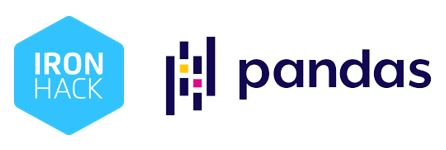

Bienvenidos a esta introducción a **DataFrames** usando **Pandas**. A lo largo de este notebook, exploraremos juntos el poder y versatilidad que **Pandas** nos ofrece, especialmente cuando trabajamos con **DataFrames**.

Pandas es una de las bibliotecas más populares y esenciales en Python para el análisis y manipulación de datos. Si te estás preguntando qué es un **DataFrame**, ¡has venido al lugar correcto! Básicamente, un **DataFrame** es una estructura de datos bidimensional, similar a una hoja de cálculo o una tabla SQL, pero con capacidades que facilitan el análisis y transformación de los datos.

En el mundo del análisis de datos y la ciencia de datos, es esencial manejar grandes cantidades de información de manera efectiva y eficiente. Y aquí es donde Pandas realmente brilla.

Durante esta clase, veremos ejemplos prácticos que te ayudarán a comprender:

1. ¿Por qué Pandas es una herramienta fundamental en el análisis de datos?
2. La diferencia entre trabajar con Python puro y Pandas para operaciones de datos.
3. Cómo crear, modificar y analizar DataFrames.

¡Empecemos nuestro viaje por el mundo de los **DataFrames con Pandas en IronHack**!

Documentación Pandas:https://pandas.pydata.org/docs/user_guide/index.html#user-guide

### **1. Python puro vs. Pandas**

Supongamos que tenemos datos de ventas de un pequeño negocio, y nos gustaría calcular el total de ventas.

### *1.1. Ventas con Python Puro*

Vamos a representar nuestras ventas con una lista de diccionarios, donde cada diccionario contiene información sobre una venta individual.


In [1]:
ventas = [
    {"producto": "camiseta", "cantidad": 5, "precio": 15},
    {"producto": "pantalones", "cantidad": 3, "precio": 40},
    {"producto": "zapatos", "cantidad": 2, "precio": 80}
]

total_ventas = sum([venta["cantidad"] * venta["precio"] for venta in ventas])
print(f"El total de ventas es: ${total_ventas}")

El total de ventas es: $355


### *1.2. Ventas con Pandas*

Ahora, vamos a representar las mismas ventas usando un DataFrame de Pandas. Verás cómo este enfoque simplifica y acelera el proceso de cálculo y análisis.

In [2]:
import pandas as pd

# Crear un DataFrame
df_ventas = pd.DataFrame(ventas)

# Calcular el total de ventas
df_ventas['total_por_producto'] = df_ventas['cantidad'] * df_ventas['precio']
total_ventas_pandas = df_ventas['total_por_producto'].sum()

print(f"El total de ventas usando Pandas es: ${total_ventas_pandas}")

El total de ventas usando Pandas es: $355


In [3]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   producto            3 non-null      object
 1   cantidad            3 non-null      int64 
 2   precio              3 non-null      int64 
 3   total_por_producto  3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


Al observar los dos enfoques, se puede notar que mientras Python puro requiere una estructura de comprensión de listas y manipulación manual de listas de diccionarios, Pandas nos ofrece una forma más directa y legible de realizar la misma operación. Esto se vuelve aún más evidente y beneficioso a medida que trabajamos con conjuntos de datos más grandes y realizamos operaciones más complejas.

### **2. Librerías a Utilizar**

Antes de sumergirnos en el análisis, es esencial entender las herramientas con las que estamos trabajando. Estas son las librerías que vamos a usar, a parte de Pandas,m y una breve descripción de cada una:

- **Seaborn**: Esta librería nos facilita la creación de gráficos estadísticos atractivos. Se integra perfectamente con DataFrames de Pandas, lo que nos permite visualizar patrones y tendencias en nuestros datos de manera rápida.

- **Matplotlib**: Es la base sobre la que se construye Seaborn. Matplotlib es una poderosa librería de visualización en Python que nos permite generar una amplia variedad de gráficos y personalizarlos a nuestro gusto. Aunque Seaborn simplifica muchas tareas, a veces necesitaremos recurrir directamente a Matplotlib para ciertas personalizaciones.

Ahora, procedamos a importar estas librerías para comenzar con nuestro análisis:

In [4]:
# pip install seaborn

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Con estas librerías listas, podemos iniciar nuestro viaje exploratorio en el mundo de los datos.

### **3. Caso de uso: Análisis TIPS dataset**

*Google Colab* proporciona algunas bibliotecas preinstaladas y facilidades para cargar datasets. Una de las bibliotecas más conocidas que viene con datasets de ejemplo es seaborn. En este caso utilizaremos TIPS.

TIPS un conjunto de datos que registra propinas dejadas por clientes en un restaurante. Utilizando Pandas y DataFrames, aprenderemos a extraer insights de este conjunto para entender mejor el comportamiento de los clientes.

In [6]:
# Cargar el dataset de propinas
df_tips = sns.load_dataset('tips')

### **3.1. Exploración Básica con DataFrames (TIPS)**

**Contexto**: El DataFrame `tips` contiene registros de propinas dejadas por diferentes clientes en un restaurante. Fue diseñado para examinar la relación entre la cuenta total de una comida y la propina dejada, además de explorar otras posibles relaciones como el día, el momento (almuerzo o cena) y el tamaño del grupo.

**Columnas**:

- **total_bill**: El coste total de la comida en dólares (USD).
- **tip**: La propina dejada por el cliente en dólares (USD).
- **sex**: El género del cliente (Hombre -male- o Mujer -Female-).
- **smoker**: Si el cliente es fumador (Sí -Yes- o No -No-).
- **day**: El día de la semana en que se registró la comida (Jue, Vie, Sáb, Dom).
- **time**: Si la comida fue almuerzo o cena (Almuerzo o Cena).
- **size**: El número total de personas en el grupo del cliente.

Lo primero que debemos hacer con un dataset es entender que datos tenemos en él. Por eso, hay varias funciones que nos permiten entender rápidamente la estructura y contenido de un DataFrame a través de Pandas. Algunas de las más útiles son:

- `head()`: Muestra las primeras filas del DataFrame.
- `info()`: Proporciona un resumen del DataFrame, incluidos el número de entradas, los tipos de datos y las columnas no nulas.
- `describe()`: Genera estadísticas descriptivas de las columnas.

In [7]:
# Muestra las primeras 5 lineas del dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# Información general
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
# Descripción estadística
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Para entender mejor como usar **DataFrames** de Pandas, vamos a plantear un análisis básico (preguntas). Estas preguntas nos ayudarán a estructurar nuestra exploración y comprender mejor las funcionalidades que ofrece Pandas para trabajar con DataFrames.

Nuestras preguntas serán:

1. **¿Cuál es la relación entre el total de la factura y la propina?**
   - Aquí aprenderemos a correlacionar dos columnas.
   
2. **¿Cuál es el promedio de propina que dejan hombres y mujeres?**
   - Esta pregunta nos llevará a utilizar la función `groupby` y aprenderemos sobre agregaciones.
   
3. **¿Cómo se distribuyen las propinas entre los días de la semana?**
   - Usaremos `groupby` nuevamente, pero de forma más compleja.
   
4. **¿Cuál es la factura total por día de la semana?**
   - Introduciremos las funciones de ventana (*windows functions*) para obtener acumulativos.
   
5. **¿Hay alguna tendencia observable en la propina basada en el tamaño del grupo que cena?**
   - Aquí aprenderemos sobre `pivot_table` y cómo nos ayuda a reestructurar y resumir datos.

No obstante, antes de analizar nuestros datos, es esencial entender y dominar las operaciones básicas con Pandas.



- **Copiar un DataFrame**: Es común querer trabajar en una copia de un DataFrame para mantener el original intacto. Sin embargo, simplemente asignar un DataFrame a una nueva variable no crea una nueva copia, sino una referencia al mismo objeto. Es decir, cualquier cambio en la "copia" afectará al original. Para evitar esto, usamos el método `.copy()`.

In [10]:
# Hacer una copia del DataFrame original
df_tips_copy = df_tips.copy()

**Nota:** Es vital entender que simplemente hacer `df_tips_copy = df_tips` no copiará el DataFrame. Ambas variables apuntarían al mismo objeto en memoria, y cualquier cambio en uno afectará al otro.

- **Renombrar columnas:** En muchos conjuntos de datos, los nombres de las columnas pueden no ser descriptivos o pueden ser confusos. Renombrar las columnas puede hacer que el DataFrame sea más legible y más fácil de trabajar.

In [11]:
# Renombrar algunas columnas para hacerlas más descriptivas
df_tips_copy.rename(columns={'sex': 'gender', 'size': 'party_size'}, inplace=True)
df_tips_copy.head()

,total_bill,tip,gender,smoker,day,time,party_size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Tip**: Usar `inplace=True` significa que el DataFrame original se modificará directamente y no se creará una copia.

- **Seleccionar datos específicos con `.iloc[]` y `.loc[]`**:  `.iloc[]` y `.loc[]` son dos de los métodos más importantes para seleccionar datos desde un DataFrame. Aunque pueden parecer similares, tienen diferencias fundamentales en su uso:
 - `.iloc[]`: Selecciona datos basado en la posición numérica. Se refiere a la ubicación del índice. Es similar a tratar el DataFrame como si fuera una matriz.
 - `.loc[]`: Selecciona datos basado en las etiquetas/nombres. Es necesario proporcionar el nombre de la columna (o fila) para acceder a los datos.

In [12]:
# Uso de iloc
# Para seleccionar la primera fila del DataFrame.
first_row = df_tips.iloc[0]
print(first_row)

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object


In [13]:
# Para seleccionar las primeras tres filas y las primeras dos columnas.
subset_data = df_tips.iloc[:3, :2]
print(subset_data)

   total_bill   tip
0       16.99  1.01
1       10.34  1.66
2       21.01  3.50


En el ejemplo de `.iloc[]` anterior, usamos números enteros para seleccionar las filas y columnas. El resultado es similar al "slicing" en listas de Python.

In [14]:
# Uso de loc
# Para seleccionar datos de la columna 'gender' para las primeras cinco filas.
gender_data = df_tips.loc[:4, 'sex']
print(gender_data)

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']


In [15]:
# Para seleccionar datos de las columnas 'gender' y 'tip' para las primeras cinco filas.
subset_data = df_tips.loc[:4, ['sex', 'tip']]
print(subset_data)

      sex   tip
0  Female  1.01
1    Male  1.66
2    Male  3.50
3    Male  3.31
4  Female  3.61


Con loc, se usan etiquetas/nombres para seleccionar. Si te fijas, se proporciona el nombre de la columna para acceder a los datos.

Aunque iloc y loc puedan parecer intercambiables, es fundamental entender sus diferencias para usarlos eficientemente. Mientras iloc se centra en la posición, loc se basa en las etiquetas. Elegir uno sobre el otro depende de la tarea específica que estés realizando.

- **Filtrar el DataFrame**: Es común que queramos trabajar solo con una parte de nuestros datos. Por ejemplo, podemos estar interesados en registros donde las propinas son superiores a $5.

In [16]:
# Filtrar el DataFrame para obtener registros donde la propina es mayor que $5
high_tips = df_tips[df_tips['tip'] > 5]
print(high_tips)

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.1

Podriamos añadir más complejidad con filtros extra:

In [17]:
high_tips_female = df_tips[(df_tips['tip'] > 5) & (df_tips['sex']=='Female')]
print(high_tips_female)

     total_bill   tip     sex smoker   day    time  size
52        34.81  5.20  Female     No   Sun  Dinner     4
85        34.83  5.17  Female     No  Thur   Lunch     4
155       29.85  5.14  Female     No   Sun  Dinner     5
214       28.17  6.50  Female    Yes   Sat  Dinner     3


#### **3.1.1 ¿Cuál es la relación entre el total de la factura y la propina?**

Para entender la relación entre dos variables, una función útil es `.corr()`, que nos da el coeficiente de correlación. Valores cercanos a 1 indican una fuerte correlación positiva, mientras que valores cercanos a -1 indican una fuerte correlación negativa.

In [18]:
correlation = df_tips['total_bill'].corr(df_tips['tip'])
correlation

np.float64(0.6757341092113645)

También podemos visualizar esta relación con un gráfico de dispersión.

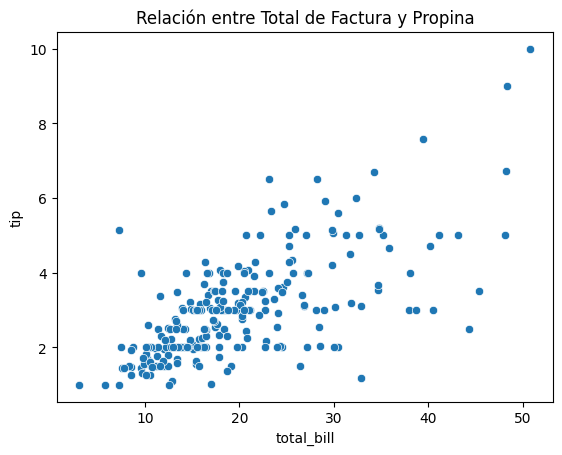

In [19]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip')
plt.title('Relación entre Total de Factura y Propina')
plt.show()

En el gráfico, cada punto representa una factura individual, con su total en el eje X y la propina correspondiente en el eje Y. Parece que hay una tendencia: a medida que la factura aumenta, también lo hace la propina.

#### **3.1.2 ¿Cuál es el promedio de propina que dejan hombres y mujeres?**

Para realizar esta tarea, utilizaremos la función `.groupby()`de Pandas. Esta función nos permite agrupar un DataFrame en base a alguna columna (en este caso, el género) y aplicar funciones de agregación (como calcular el promedio) a las columnas de interés.

In [20]:
avg_tip_gender = df_tips.groupby('sex')['tip'].mean()
avg_tip_gender

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\1361533091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_gender = df_tips.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

La salida muestra el promedio de propinas para hombres y mujeres. Esta es una de las ventajas de Pandas: con una sola línea de código, podemos obtener resúmenes potentes de los datos.

Para visualizar de forma clara las diferencias en los promedios, usaremos un gráfico de barras:

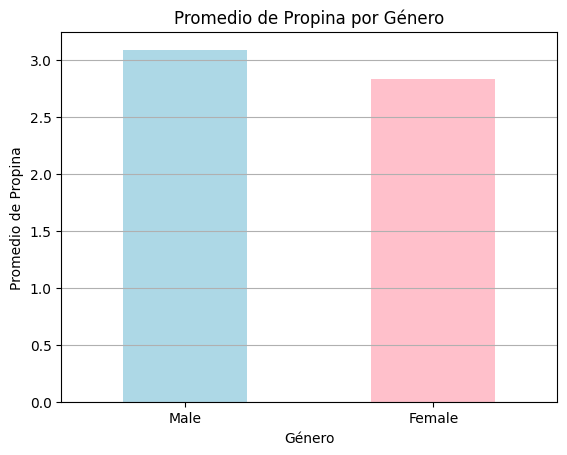

In [21]:
avg_tip_gender.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Promedio de Propina por Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Propina')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

A partir de los resultados obtenidos, podríamos observar **[si hay / no hay]** una diferencia significativa entre el promedio de propinas dejadas por hombres y mujeres. Es importante recordar que, aunque podemos identificar diferencias en el promedio, esto no necesariamente implica causalidad. Siempre es bueno considerar otros factores o variables que podrían estar influenciando estas observaciones.

#### **Extra Tip: Potencial del `groupby`**

La función `groupby` es una herramienta poderosa y versátil en Pandas que te permite agrupar tus datos de acuerdo a alguna categoría y luego aplicar una operación a esos grupos. A continuación, presento algunas operaciones que puedes hacer con `groupby`:

- **`.mean()`**: Calcula el promedio de los grupos. Por ejemplo, `tips.groupby('sex')['total_bill'].mean()` te daría el promedio de la factura por género.
  
- **`.sum()`**: Retorna la suma de los grupos. Así, `tips.groupby('sex')['total_bill'].sum()` nos da la suma total de las facturas según el género.
  
- **`.max()` y `.min()`**: Obtiene el valor máximo o mínimo de cada grupo, respectivamente.
  
- **`.agg()`**: Esta es una función de agregación que te permite especificar múltiples estadísticas para cada grupo en una sola operación. Por ejemplo:

In [22]:
df_tips.groupby('sex').agg({'total_bill': ['mean', 'sum'], 'tip': ['max', 'min']})

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\756302550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('sex').agg({'total_bill': ['mean', 'sum'], 'tip': ['max', 'min']})


total_bill            tip     
             mean      sum   max  min
sex                                  
Male    20.744076  3256.82  10.0  1.0
Female  18.056897  1570.95   6.5  1.0

- **`.transform()`**: Te permite realizar una operación específica en cada grupo y devolver un DataFrame con el índice original. Un ejemplo podría ser estandarizar datos dentro de grupos:

In [23]:
# Podriamos crear una columna extra, añadiencdo df_tips['zscore'] = df_tips.groupby('sex')['tip'].transform(zscore)
zscore = lambda x: (x - x.mean()) / x.std()
df_tips.groupby('sex')['tip'].transform(zscore)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\25659643.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('sex')['tip'].transform(zscore)


0     -1.572623
1     -0.960054
2      0.275590
3      0.147997
4      0.669733
         ...   
239    1.900731
240   -0.718803
241   -0.731728
242   -0.899615
243    0.143642
Name: tip, Length: 244, dtype: float64

- **`.filter()`:** Esta operación permite filtrar datos basados en propiedades del grupo. Por ejemplo, si quisieras mantener solo los días donde la factura promedio supera un cierto valor:

In [24]:
df_tips.groupby('day').filter(lambda x: x['total_bill'].mean() > 20)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\2832618003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('day').filter(lambda x: x['total_bill'].mean() > 20)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


#### **3.1.3 ¿Cómo se distribuyen las propinas entre los días de la semana?**

En muchos restaurantes, los días de la semana pueden influir en la cantidad y el total de las propinas que los camareros reciben. Esto puede estar relacionado con el tráfico de clientes, la naturaleza de las reservas (por ejemplo, eventos especiales o cenas de fin de semana) u otros factores. Aquí, vamos a crear una nueva columna que represente el porcentaje de propina con respecto a la factura total. Luego, utilizaremos esta nueva columna para analizar cómo se distribuyen las propinas en relación con el total de la factura a lo largo de la semana.

In [25]:
df_tips['tip_percentage'] = (df_tips['tip'] / df_tips['total_bill']) * 100
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Una vez que hemos creado la nueva columna, podemos agrupar los datos por día y sexo del cliente y luego obtener estadísticas descriptivas usando `.agg()`.

In [26]:
grouped_data = df_tips.groupby(['day', 'sex']).agg({'tip_percentage': ['mean', 'std', 'min', 'max']}).reset_index()
grouped_data

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\4194324150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_tips.groupby(['day', 'sex']).agg({'tip_percentage': ['mean', 'std', 'min', 'max']}).reset_index()


day     sex tip_percentage                                
                          mean       std        min        max
0  Thur    Male      16.527649  4.586551   7.861635  26.631158
1  Thur  Female      15.752483  3.068869   7.296137  21.150934
2   Fri    Male      14.338519  3.622837  10.355540  22.377622
3   Fri  Female      19.938840  4.217047  14.285714  26.348039
4   Sat    Male      15.157684  4.694377   3.563814  29.198966
5   Sat  Female      15.647021  6.024322   5.643341  32.573290
6   Sun    Male      16.234407  8.852944   6.565988  71.034483
7   Sun  Female      18.156877  7.143018   5.944673  41.666667

No obstante, las columnas se están generando como un MultiIndex debido a la función `.agg`. Podemos aplanar este MultiIndex y nombrar las columnas de manera más accesible. Para evitar esto, podemos realizar la agrupación de la siguiente forma:

In [27]:
# Definimos las funciones de agregación
agg_funcs = {
    'tip_percentage': ['mean', 'std', 'min', 'max']
}

grouped_data = df_tips.groupby(['day', 'sex']).agg(agg_funcs).reset_index()

# Renombramos las columnas después de la agregación para evitar MultiIndex
grouped_data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_data.columns.values]

grouped_data.head()

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\52982148.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_tips.groupby(['day', 'sex']).agg(agg_funcs).reset_index()


,day,sex,tip_percentage_mean,tip_percentage_std,tip_percentage_min,tip_percentage_max
0,Thur,Male,16.527649,4.586551,7.861635,26.631158
1,Thur,Female,15.752483,3.068869,7.296137,21.150934
2,Fri,Male,14.338519,3.622837,10.355540,22.377622
3,Fri,Female,19.938840,4.217047,14.285714,26.348039
4,Sat,Male,15.157684,4.694377,3.563814,29.198966


Este código primero realiza las operaciones de agregación. Luego, renombra las columnas después de la agregación utilizando una list comprehension para formatear los nombres de las columnas. Hay otras formas de hacerlo, pero por ahora esta te va a servir.

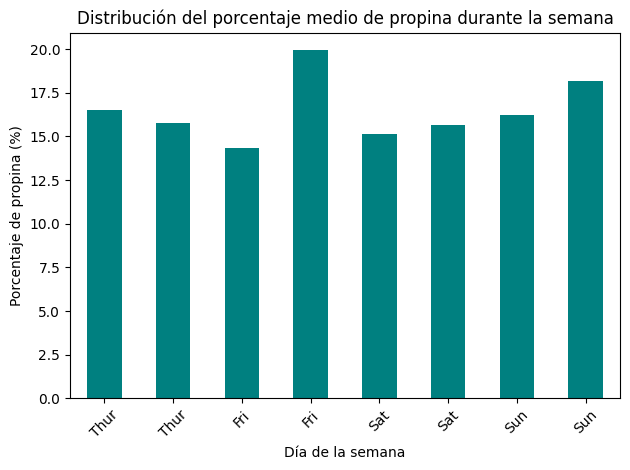

In [28]:
grouped_data.reset_index(inplace=True)  # Reseteamos el índice para facilitar el gráfico
grouped_data.plot(x='day', y='tip_percentage_mean', kind='bar', legend=False, color='teal')
plt.title('Distribución del porcentaje medio de propina durante la semana')
plt.ylabel('Porcentaje de propina (%)')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Después de haber agrupado nuestros datos por día y sexo, y haber calculado el porcentaje medio de propina, ahora vamos a visualizar estos resultados. Para ello, vamos a utilizar un gráfico de barras, que es una herramienta eficaz para comparar cantidades de diferentes categorías.

El eje X de nuestro gráfico representa los días de la semana, mientras que el eje Y muestra el porcentaje medio de propina dado en ese día. Así, podemos tener una vista rápida y clara de cómo se distribuye el comportamiento de propinas a lo largo de la semana.

En el gráfico, podemos observar:

- La altura de cada barra muestra el porcentaje medio de propina para ese día específico.
- La elección del color "teal" (verde azulado) es meramente estética y para proporcionar una visualización clara.

Estudiar este tipo de gráficos nos ayuda a identificar tendencias, patrones o cualquier anomalía en los datos. Por ejemplo, podríamos descubrir si hay un día específico en el que los clientes tienden a ser más generosos con las propinas, lo que podría indicar una mayor afluencia de clientes o tal vez alguna promoción especial que incite a los clientes a dar mayores propinas.

#### **3.1.4 ¿Cuál es la factura total por día de la semana?**

En muchas situaciones, nos interesa no solo agrupar y sumar datos, sino también entender cómo se acumulan o se distribuyen a lo largo de una variable específica. Las funciones de ventana en Pandas nos permiten hacer precisamente eso. Por ejemplo, podemos querer saber cómo se acumulan las ventas a lo largo de la semana o cómo se distribuyen las propinas durante los días. En este ejercicio, vamos a investigar cómo se acumula la factura total por día de la semana.

Comenzaremos agrupando nuestros datos por día de la semana y sumando las facturas para cada día. Después, utilizaremos la función `.cumsum()` para obtener un acumulado.

In [29]:
# Agrupamos por día y sumamos las facturas
total_bill_per_day = df_tips.groupby('day')['total_bill'].sum().sort_values()

# Usamos cumsum() para obtener el acumulado
total_bill_cumsum = total_bill_per_day.cumsum()

total_bill_cumsum

C:\Users\emartin4\AppData\Local\Temp\ipykernel_26188\3023005758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_per_day = df_tips.groupby('day')['total_bill'].sum().sort_values()


day
Fri      325.88
Thur    1422.21
Sun     3049.37
Sat     4827.77
Name: total_bill, dtype: float64

La función `.cumsum()` es una función de ventana que proporciona la suma acumulada de una serie o DataFrame. Así, después de agrupar y sumar nuestras facturas por día, utilizamos `.cumsum()` para obtener un valor acumulativo a lo largo de los días de la semana. Para visualizar estos datos, un gráfico de barras es apropiado, ya que queremos ver tanto la factura total por día como el acumulado.

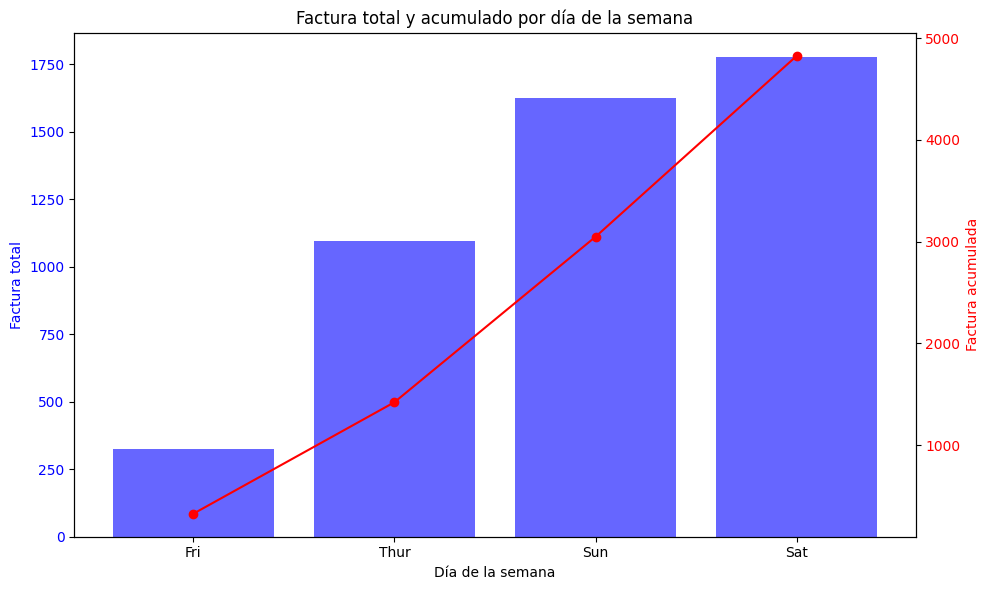

In [30]:
# Plot de los datos
fig, ax1 = plt.subplots(figsize=(10,6))

# Eje principal con las facturas por día
ax1.bar(total_bill_per_day.index, total_bill_per_day.values, color='blue', alpha=0.6, label='Factura por día')
ax1.set_title('Factura total y acumulado por día de la semana')
ax1.set_xlabel('Día de la semana')
ax1.set_ylabel('Factura total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje secundario con el acumulado
ax2 = ax1.twinx()
ax2.plot(total_bill_cumsum.index, total_bill_cumsum.values, color='red', marker='o', label='Factura acumulada')
ax2.set_ylabel('Factura acumulada', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()


En este gráfico, las barras azules representan la factura total por día, mientras que la línea roja muestra cómo se acumula esta factura a lo largo de la semana.

Las funciones de ventana, como `.cumsum()`, son herramientas poderosas cuando se desea comprender la distribución o acumulación de datos a lo largo de una variable. En nuestro caso, observamos cómo se acumulan las facturas a lo largo de los días de la semana. Estas técnicas son esenciales, especialmente en análisis financieros o de ventas, donde los acumulados son cruciales para la toma de decisiones.



**Extra tips** funciones de ventana (windows functions) más comunes disponibles en Pandas:
- `.cumsum()`: Calcula la suma acumulada de elementos a lo largo de una ventana.- `.cumprod()`: Proporciona el producto acumulado de los elementos.
- `.cummax()`: Devuelve el máximo acumulado de los elementos.
- `.cummin()`: Ofrece el mínimo acumulado de los elementos.
- `.rolling(window=)`: Crea una vista móvil, que es útil para operaciones como la media móvil.

In [31]:
df_tips['tip'].rolling(window=3).mean()

0           NaN
1           NaN
2      2.056667
3      2.823333
4      3.473333
         ...   
239    3.920000
240    4.196667
241    3.306667
242    1.916667
243    2.250000
Name: tip, Length: 244, dtype: float64

Esto calculará la media móvil de 3 periodos para column_name.

- `.expanding(min_periods=)`: Crea una vista en expansión, es decir, el tamaño de la ventana aumenta a lo largo del tiempo.

In [32]:
df_tips['total_bill'].expanding(min_periods=2).mean()

0            NaN
1      13.665000
2      16.113333
3      18.005000
4      19.322000
         ...    
239    19.755500
240    19.786307
241    19.798223
242    19.790082
243    19.785943
Name: total_bill, Length: 244, dtype: float64

Esto calculará la suma acumulativa de total_bill, comenzando desde el segundo periodo.

- `.shift(periods=)`: Desplaza los datos en una cantidad específica de periodos. Es útil para calcular diferencias con periodos anteriores.

In [33]:
df_tips['total_bill'].shift(1)

0        NaN
1      16.99
2      10.34
3      21.01
4      23.68
       ...  
239    35.83
240    29.03
241    27.18
242    22.67
243    17.82
Name: total_bill, Length: 244, dtype: float64

Esto desplazará los datos de total_bill un periodo hacia adelante.

- `.diff(periods=)`: Calcula la diferencia entre un elemento y un elemento previo en una serie o DataFrame.

In [34]:
df_tips['total_bill'].diff(1)

0        NaN
1      -6.65
2      10.67
3       2.67
4       0.91
       ...  
239    -6.80
240    -1.85
241    -4.51
242    -4.85
243     0.96
Name: total_bill, Length: 244, dtype: float64

Esto calculará la diferencia con el periodo anterior para total_bill.

Estas son solo algunas de las funciones de ventana disponibles en Pandas. Se pueden utilizar de manera efectiva para realizar análisis temporales, financieros o para cualquier conjunto de datos donde los cálculos acumulativos o móviles sean relevantes. Al combinarlas con operaciones de agrupación, puedes obtener insights detallados sobre la estructura y tendencias de tus datos.

  #### **3.1.5 ¿Hay alguna tendencia observable en la propina basada en el tamaño del grupo que cena?**

  Cuando comemos en grupo, la dinámica de dar propina puede cambiar. Ya sea por la naturaleza social de comer en grupo o por la percepción de un servicio más intensivo para grupos más grandes, podríamos esperar que el tamaño del grupo influya en la propina. Para entender esto, usaremos la función `pivot_table` que nos ayuda a resumir y reestructurar nuestros datos de una manera que podamos visualizar y analizar de forma más clara.

  Una `pivot_table` es esencialmente una tabla de resumen, que toma datos simples en columnas y los convierte en una tabla de dos dimensiones. Esto nos permite observar la relación entre dos columnas y cómo una tercera columna podría variar con respecto a esas dos.

In [35]:
pivot_data = df_tips.pivot_table(values='tip', index='size', aggfunc='mean')
pivot_data

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


Para visualizar la relación, podemos usar un gráfico de barras:

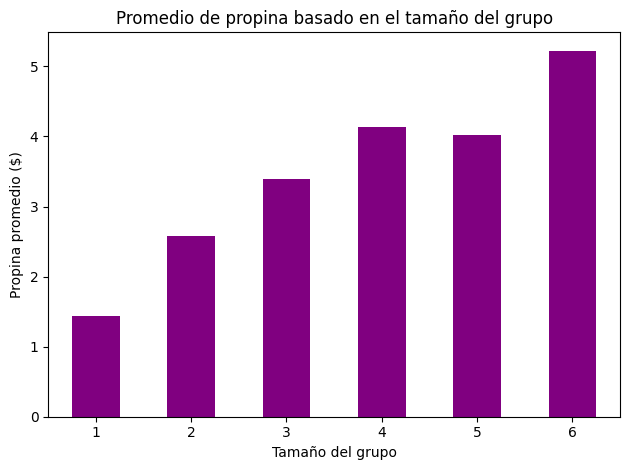

In [36]:
pivot_data.plot(kind='bar', color='purple', legend=False)
plt.title('Promedio de propina basado en el tamaño del grupo')
plt.ylabel('Propina promedio ($)')
plt.xlabel('Tamaño del grupo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Después de observar el gráfico, es posible que veamos una tendencia creciente en la propina a medida que aumenta el tamaño del grupo, lo que podría indicar que los grupos más grandes tienden a dejar propinas más generosas. Sin embargo, es esencial considerar que la propina también puede estar influenciada por factores como el total de la factura, el servicio recibido y otras variables que no estamos considerando directamente en este análisis.


**Extra tips** `pivot_table` en detalle:

- `values`: Es la columna que queremos resumir o analizar. En nuestro caso, nos interesa el valor de la "propina".

- `index`: Es la columna contra la que queremos analizar nuestros valores. Estamos interesados en el "tamaño" del grupo.

- `aggfunc`: Es la función de agregación que aplicamos a nuestros valores. En este caso, estamos interesados en la "media", pero podríamos haber usado `.sum`, `.min`, `.max`, entre otros.

La función `pivot_table` es potentemente flexible y se puede utilizar para analizar datos de muchas formas diferentes. Es una herramienta fundamental para el análisis de datos en Pandas.

### **4. Viajando a través del tiempo con el auge de la aviación**

Imagínate estar en los años 40 y 50, una época en la que la aviación comercial estaba comenzando a despegar (literalmente). El mundo estaba viendo un aumento sin precedentes en el número de personas que viajaban en avión, ya fuera por negocios, placer o para volver a casa después de la Segunda Guerra Mundial.

Pero, ¿cómo fue realmente este aumento en el tráfico aéreo? ¿Fue constante año tras año o hubo altibajos? ¿Había meses en los que más personas volaban en comparación con otros? ¿Puedes imaginar a las personas prefiriendo volar en diciembre por las vacaciones o en verano para escapar del calor?

**Tu misión**, si decides aceptarla, es sumergirte en un dataset que captura el número de pasajeros que volaron en aviones comerciales desde 1949 hasta 1960. A través de este análisis, no solo perfeccionarás tus habilidades en pandas y visualización, sino que también te embarcarás en un viaje a través del tiempo para descubrir las tendencias y patrones en la historia de la aviación.

**¡Buena suerte y que tengas un vuelo agradable a través de los datos!**

In [37]:
# Cargar el dataset 'flights'
df_flights = sns.load_dataset('flights')

# Verificar las primeras filas del dataframe (esto viene de regalo :) )
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
